In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import plot_settings
from plot_settings import colors

%config InlineBackend.figure_format = 'retina'

In [3]:
df_spotify_c = pd.read_csv('spotify_streams_2024_cleaned.csv')
df_spotify_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [4]:
df_spot_cle_tr = df_spotify_c
drop_c = ['Album Name','Release Date', 'ISRC','YouTube Playlist Reach',
       'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track']
df_spot_cle_tr = df_spot_cle_tr.drop(columns=drop_c)

In [5]:
df_spot_cle_tr.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,Apple Music Playlist Count
count,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.427000e+03,3.620000e+03,3.619000e+03,4039.00000
mean,41.844043,4.473873e+08,59390.829801,2.334682e+07,63.501581,4.027967e+08,2.930049e+06,9.443076e+05,1.126375e+08,1.161158e+09,54.60312
std,38.543766,5.384439e+08,71131.406625,2.968717e+07,16.186438,7.019000e+08,4.593640e+06,2.442080e+06,5.498123e+08,5.881584e+09,71.61227
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,1.00000
25%,23.300000,7.038630e+07,6718.000000,4.791612e+06,61.000000,4.073032e+07,4.095490e+05,3.818650e+04,5.814876e+06,5.902786e+07,10.00000
50%,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,2.659172e+08,28.00000
75%,44.425000,6.283638e+08,86038.750000,2.966069e+07,73.000000,4.647882e+08,3.573193e+06,7.948775e+05,9.328418e+07,9.134169e+08,70.00000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,859.00000


In [6]:
df_spot_cle_tr['Track Score'].max()

725.4

In [7]:
grouped_sp_ap = df_spot_cle_tr.groupby('Artist')[['Apple Music Playlist Count', 'Spotify Playlist Count']].sum()
grouped_sp_yt = df_spot_cle_tr.groupby('Artist')[['YouTube Views', 'Spotify Streams']]
grouped_spa_cut = grouped_sp_ap.sort_values(by='Spotify Playlist Count', ascending=False)
grouped_spa_cut = grouped_spa_cut[0:50].copy()
grouped_spa_cut.head()


,Apple Music Playlist Count,Spotify Playlist Count
Artist,,
Drake,4593.0,6469132.0
Bad Bunny,3052.0,4432584.0
The Weeknd,4078.0,4233026.0
Travis Scott,1708.0,3203723.0
Post Malone,2630.0,3130666.0


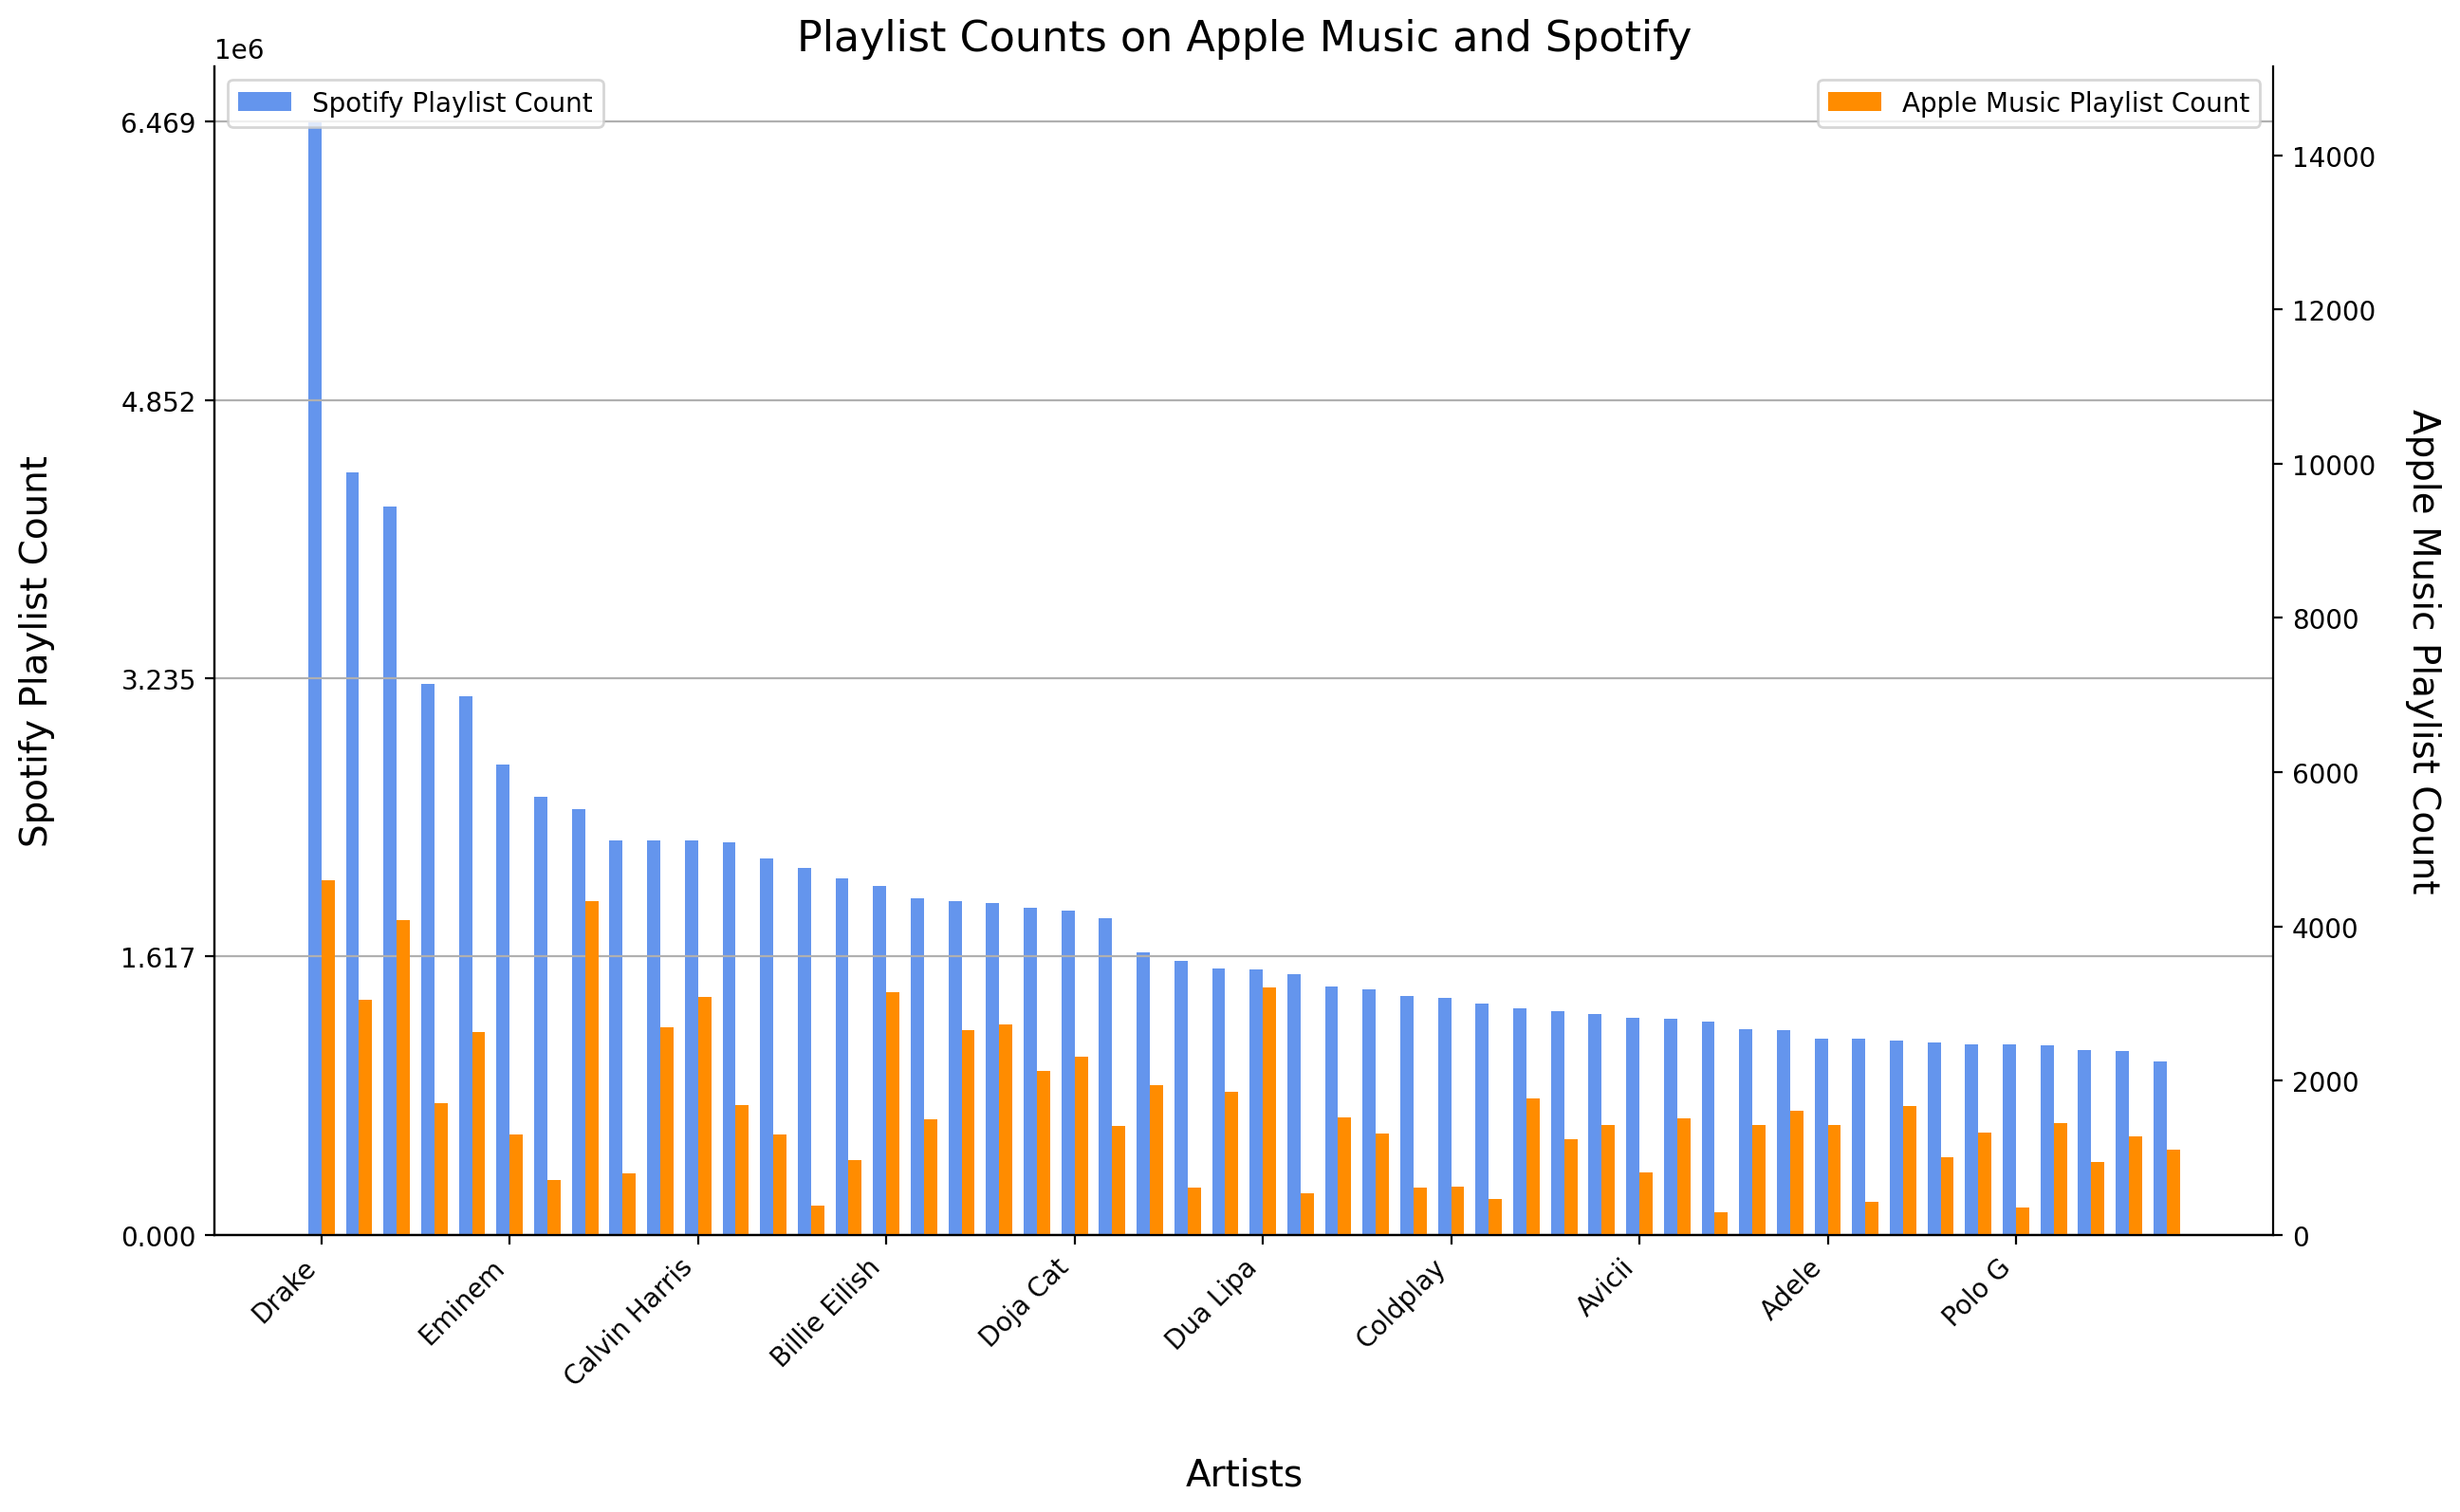

In [22]:
fig, ax1 = plt.subplots(figsize=(14, 8))

w = .35
xticks = np.arange(0, len(grouped_spa_cut),5)
yticks = np.linspace(0, grouped_spa_cut['Spotify Playlist Count'].max(), num=5)
x = np.arange(len(grouped_spa_cut))

color1 = colors['blue']
color2 = colors['orange']

ax1.bar(x - w/2, grouped_spa_cut['Spotify Playlist Count'], w, color=color1, label='Spotify Playlist Count')
ax2 = ax1.twinx()  
ax2.bar(x + w/2, grouped_spa_cut['Apple Music Playlist Count'], w, color=color2, label='Apple Music Playlist Count')

ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_xticklabels(grouped_spa_cut.index[::5], rotation=45, ha='right')

max_apple_music = grouped_spa_cut['Apple Music Playlist Count'].max()
ax2.set_ylim(0, max_apple_music * 3.3) 
ax2.tick_params(axis='y')

ax1.set_xlabel('Artists', labelpad=25)
ax1.set_ylabel('Spotify Playlist Count', labelpad=25)
ax2.set_ylabel('Apple Music Playlist Count', rotation=270, labelpad=25)

ax1.yaxis.grid(True)

plt.title('Playlist Counts on Apple Music and Spotify')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Hide top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()